In [2]:
#import dataset
import pandas as pd
df=pd.read_csv(r'C:\Users\himanshimehta\Downloads\cardio\CardioVascularDisease\cardio_train.csv',sep=';')

In [3]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
#import specific library

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [5]:
#dropping column id
df.drop(columns=['id'],axis=1,inplace=True)

In [6]:
#converting age column in days to years
df['age']=(df['age']/365).round().astype(int)

In [7]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,53.338177,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,6.765427,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#no null values 
df.isnull().all()

age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

In [9]:
df['cardio'].value_counts()

0    34679
1    34622
Name: cardio, dtype: int64

In [10]:
df['female']=df['gender']==1
df['sex']=np.where(df['female']==True,1,0)
df.drop(columns=['gender','female'],axis=1,inplace=True)

### plotting visualization

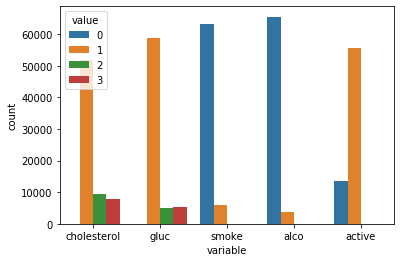

In [11]:

df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));

### from heatmap cardio is postive correlation with (highly) age weight cholesterol

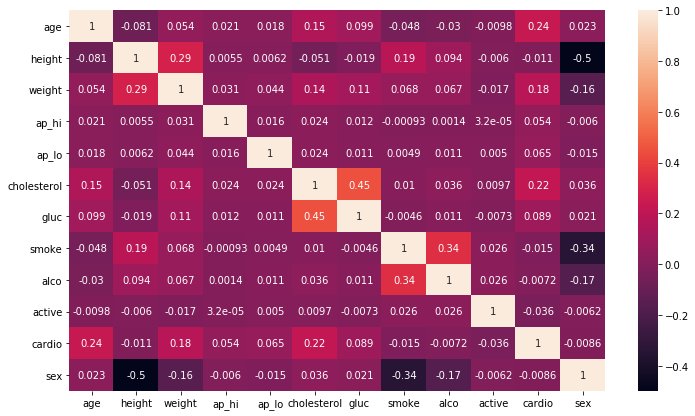

In [12]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True)

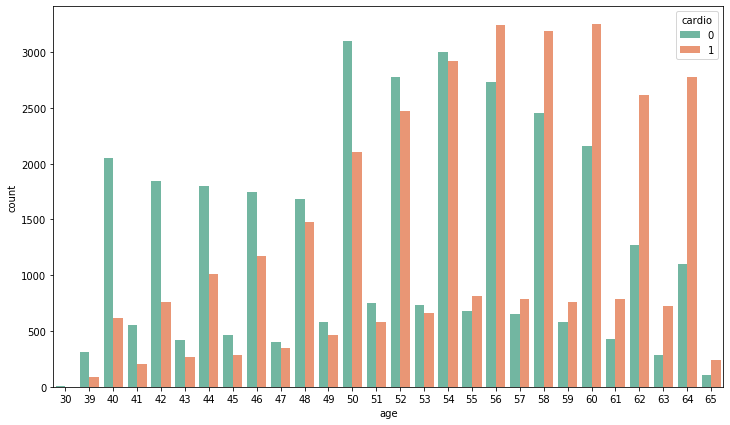

In [13]:
plt.figure(figsize=(12,7))
sns.countplot(x='age', hue='cardio', data = df, palette="Set2");

### removing outliers

In [14]:
df.describe()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,sex
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,53.338177,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589,0.650481
std,6.765427,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003,0.476821
min,30.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,65.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


here from the describe mehod as we can see min age is 30 and weight 10 and height is 55 cm so its error 

In [15]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

### On repeated measurements, diastolic blood pressure (DBP) was always reported to be zero while patient's systolic blood pressure (SBP) varied between 130 and 180 mmHg. NIBP was measured in the opposite arm which also showed zero DBP.

In [16]:
print(df[df['ap_lo']<=0])
df.drop(df[(df['ap_hi']>200) & (df['ap_lo']<=0)].index,inplace=True)

       age  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
1315    62     167    59.0    906      0            1     1      0     0   
12790   41     150    60.0    130      0            1     1      0     0   
16682   50     164    78.0    138      0            1     1      0     0   
22224   58     166    68.0    149      0            1     1      0     0   
23168   44     161    92.0    906      0            2     1      0     0   
24755   49     176    73.0     12      0            1     1      0     0   
26987   64     180    73.0    140      0            1     1      1     1   
31084   44     170    64.0    907      0            1     1      0     0   
37671   64     170    81.0    148      0            1     1      0     0   
41698   49     176    69.0    906      0            1     1      0     0   
43223   52     164    78.0    108      0            2     1      0     0   
45136   54     165    70.0    140      0            3     1      1     0   
47350   52  

### also this data is wrong classified

In [17]:
df[df['ap_lo']> df['ap_hi']]

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,sex
20,64,170,74.0,140,1000,1,1,0,0,1,1,0
182,48,170,84.0,150,1100,1,1,1,0,0,1,0
228,60,175,70.0,14,90,3,1,0,0,1,1,0
280,50,172,65.0,11,80,1,3,0,0,1,0,1
301,58,168,82.0,160,1000,2,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69072,64,167,81.0,160,1000,1,1,0,0,1,1,1
69173,60,152,56.0,160,1000,1,1,0,0,1,1,1
69179,58,168,95.0,160,1000,1,1,0,0,1,1,0
69186,61,166,78.0,170,1000,1,1,0,0,0,0,0


In [18]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

In [19]:
df["bmi"] = df["weight"]/ (df["height"]/100)**2

In [20]:
df

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,sex,bmi
0,62,155,69.0,130,80,2,2,0,0,1,0,1,28.720083
1,40,163,71.0,110,70,1,1,0,0,1,1,1,26.722873
2,60,165,70.0,120,80,1,1,0,0,1,0,1,25.711662
3,40,165,85.0,120,80,1,1,1,1,1,0,0,31.221304
4,64,155,62.0,120,80,1,1,0,0,1,0,1,25.806452
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69294,54,172,70.0,130,90,1,1,0,0,1,1,1,23.661439
69295,58,165,80.0,150,80,1,1,0,0,1,1,1,29.384757
69296,53,168,76.0,120,80,1,1,1,0,1,0,0,26.927438
69299,61,163,72.0,135,80,1,2,0,0,0,1,1,27.099251


In [21]:
df.describe()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,sex,bmi
count,59555.000000,59555.000000,59555.000000,59555.000000,59555.000000,59555.000000,59555.000000,59555.000000,59555.000000,59555.000000,59555.000000,59555.000000,59555.000000
mean,53.337537,164.556679,73.421721,125.763832,81.043674,1.350785,1.220217,0.085568,0.051986,0.803896,0.488036,0.652724,27.168340
std,6.747173,6.829996,11.609272,13.760110,8.236916,0.670012,0.567605,0.279727,0.222000,0.397052,0.499861,0.476108,4.403805
min,30.000000,150.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.049383
25%,48.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,23.875115
50%,54.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,26.259585
75%,58.000000,169.000000,80.000000,135.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,29.752066
max,65.000000,180.000000,106.000000,162.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.666667


In [22]:
df[df['ap_lo']==120]

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,sex,bmi


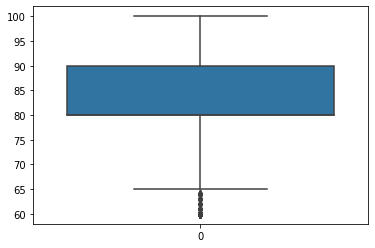

In [23]:
sns.boxplot(data=df['ap_lo'])

In [24]:
df=df[['age','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','sex','bmi','cardio']]

In [25]:
df

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,sex,bmi,cardio
0,62,155,69.0,130,80,2,2,0,0,1,1,28.720083,0
1,40,163,71.0,110,70,1,1,0,0,1,1,26.722873,1
2,60,165,70.0,120,80,1,1,0,0,1,1,25.711662,0
3,40,165,85.0,120,80,1,1,1,1,1,0,31.221304,0
4,64,155,62.0,120,80,1,1,0,0,1,1,25.806452,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69294,54,172,70.0,130,90,1,1,0,0,1,1,23.661439,1
69295,58,165,80.0,150,80,1,1,0,0,1,1,29.384757,1
69296,53,168,76.0,120,80,1,1,1,0,1,0,26.927438,0
69299,61,163,72.0,135,80,1,2,0,0,0,1,27.099251,1


In [26]:
x=df.iloc[:,0:12]
y=df['cardio']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=42)

C:\Users\himanshimehta\.conda\envs\py37_64\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [28]:
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini', random_state=100,max_depth=10)
dt.fit(X_train,y_train)
# y_pred = dt.predict(X_test) 
# print(f'Train Accuracy for Decision Tree is : {accuracy_score(y_test,y_pred)}')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [29]:
import pickle

### try to predict for cardio detection here cholestrol is maintain to 1(low) and glucose also low

In [32]:
pickle.dump(dt, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
x=model.predict([[56,172,80,150,80,1,1,1,1,1,1,32]])
x[0]


0

In [34]:
y_pred = dt.predict(X_test) 
print(f'Train Accuracy for Decision Tree is : {accuracy_score(y_test,y_pred)}')

Train Accuracy for Decision Tree is : 0.7147254715397101


In [35]:
y_pred

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix 
a=confusion_matrix(y_test,y_pred)

In [37]:
a

array([[7104, 1995],
       [3102, 5666]], dtype=int64)

### accurate examples

In [39]:
total_acc=a[0][0]+a[1][1]

12770

### need to improve

In [42]:
wrongly_classified=a[0][1]+a[1][0]

5097